In [5]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display
import warnings
warnings.filterwarnings('ignore')

In [3]:
import librosa
audio_path = '/content/03-01-01-01-01-01-01.wav'
x,sr = librosa.load(audio_path)

spectral centroid

In [7]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(143,)

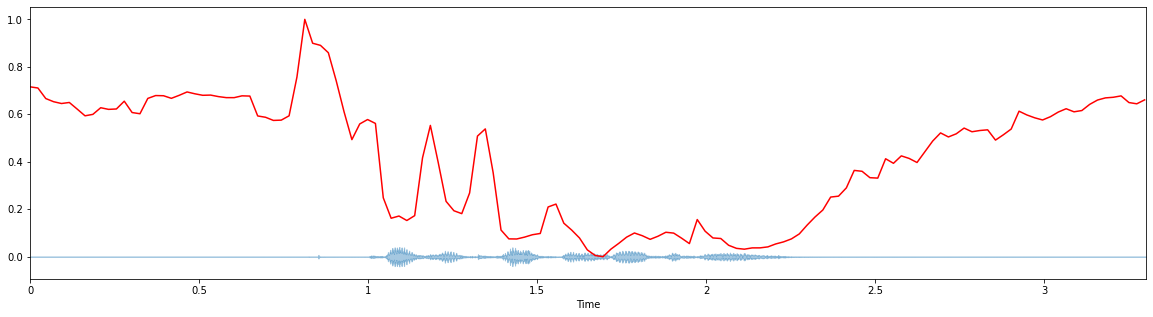

In [8]:
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

spectral rolloff

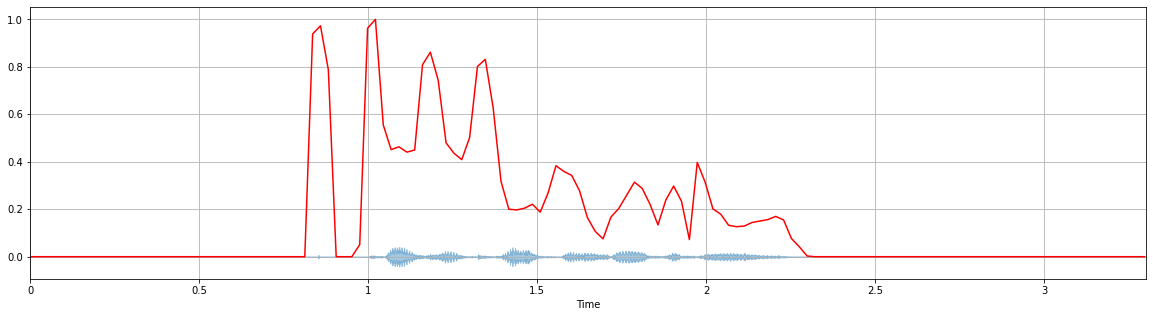

In [9]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()


mfcc

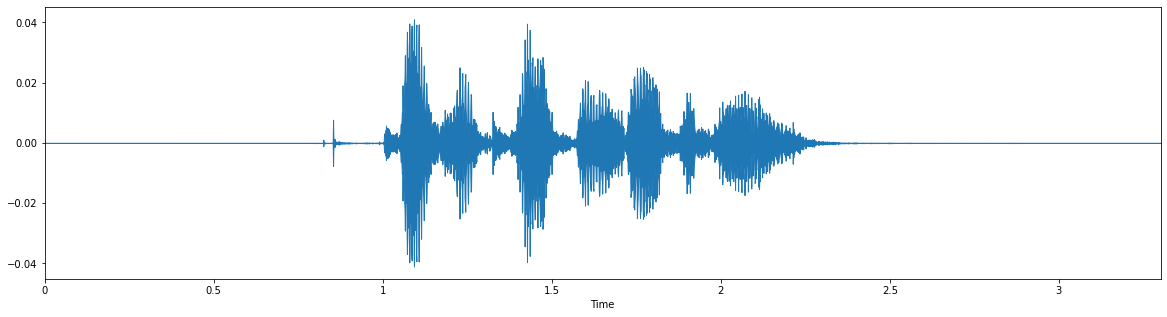

In [10]:
plt.figure(figsize=(20,5))
x, fs = librosa.load(audio_path)
librosa.display.waveplot(x, sr=sr)

(20, 143)


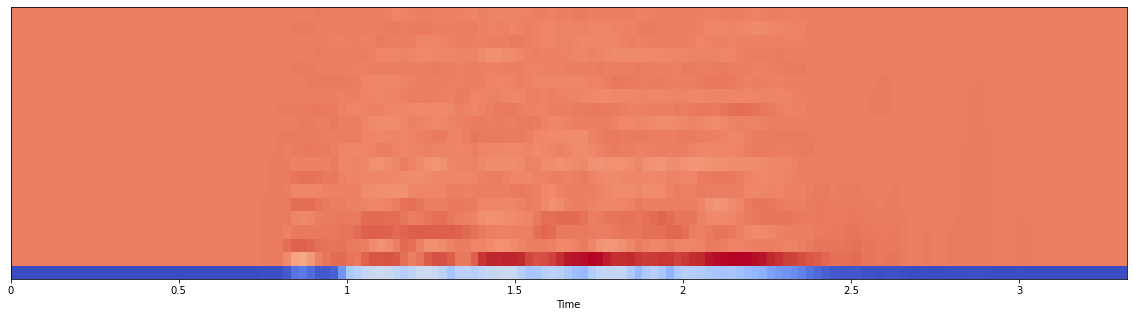

In [11]:
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')


chroma

In [12]:
# Loadign the file
x, sr = librosa.load(audio_path)


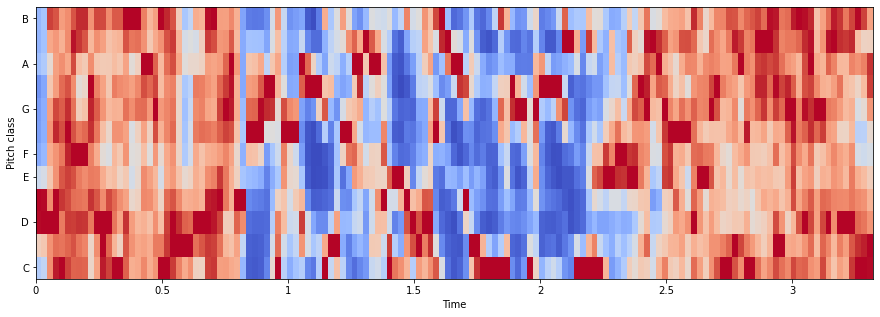

In [13]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')